In [13]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, HuberRegressor, Ridge
from sklearn.inspection import permutation_importance
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import optuna
import shap



## Loading datasets

In [3]:
train = pd.read_csv("train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [4]:
train.head(5)

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,104.0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.477941,0.423927,34.043022,6079.08526
1,1,764.0,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.334594,0.354415,27.735098,2946.92602
2,2,621.0,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.468192,0.417915,34.838815,5323.30034
3,3,499.0,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.500558,0.427431,35.134955,6157.05484
4,4,439.0,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.520181,0.464067,37.029180,6992.82314


In [47]:
train.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,427.577533,19.773500,0.388500,0.284573,0.486751,0.591612,82.245667,49.719033,68.717353,59.282947,28.686927,48.611360,18.804700,0.327261,0.501015,0.445967,36.115335,6022.687345
std,4330.271354,214.127422,6.644451,0.390162,0.058855,0.147560,0.144194,9.104125,5.519865,7.606632,6.579928,3.180584,5.371006,11.880294,0.166934,0.077379,0.038092,4.121393,1362.796312
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,56.800000,50.200000,24.300000,30.000000,1.000000,0.060000,0.029066,0.217545,22.079199,1637.704020
25%,3749.750000,247.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451083,0.418220,33.239806,5124.854900
50%,7499.500000,469.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506225,0.446518,36.040675,6107.382470
75%,11249.250000,598.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.564795,0.472271,39.099614,7028.673500
max,14999.000000,777.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,62.000000,34.000000,0.560000,0.960586,0.645475,46.369344,8969.401840


In [24]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   Row#                  10000 non-null  float64
 2   clonesize             10000 non-null  float64
 3   honeybee              10000 non-null  float64
 4   bumbles               10000 non-null  float64
 5   andrena               10000 non-null  float64
 6   osmia                 10000 non-null  float64
 7   MaxOfUpperTRange      10000 non-null  float64
 8   MinOfUpperTRange      10000 non-null  float64
 9   AverageOfUpperTRange  10000 non-null  float64
 10  MaxOfLowerTRange      10000 non-null  float64
 11  MinOfLowerTRange      10000 non-null  float64
 12  AverageOfLowerTRange  10000 non-null  float64
 13  RainingDays           10000 non-null  float64
 14  AverageRainingDays    10000 non-null  float64
 15  fruitset            

## Model for ordinal dataset

In [77]:

X = train.drop('yield', axis=1)
y = train['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



model = RandomForestRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=6, bootstrap=True, n_jobs=-1, random_state=42, max_features='sqrt')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_pred_test = model.predict(test)

MAE_test = mean_absolute_error(y_test, y_pred)
MAE_train = mean_absolute_error(y_train, y_pred_train)
print(MAE_test, MAE_train)

#MAE_train = -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1).mean()
#MAE_test = -cross_val_score(model, X_test, y_test, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1).mean()
#print(MAE_train)
#print(MAE_test)

258.3700837349471 230.87649447108637


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [35]:
X = train.drop('yield', axis=1)
y = train['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_pred_test = model.predict(test)

MAE_test = mean_absolute_error(y_test, y_pred)
MAE_train = mean_absolute_error(y_train, y_pred_train)
print(MAE_test, MAE_train)

276.1387741935254 274.23422604938713


In [6]:
X = train.drop('yield', axis=1)
y = train['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = HuberRegressor(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

#y_pred_test = model.predict(test)

MAE_test = mean_absolute_error(y_test, y_pred)
MAE_train = mean_absolute_error(y_train, y_pred_train)
print(MAE_test, MAE_train)

401.7287837733044 401.40607618537473


In [7]:
X = train.drop('yield', axis=1)
y = train['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RidgeCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

#y_pred_test = model.predict(test)

MAE_test = mean_absolute_error(y_test, y_pred)
MAE_train = mean_absolute_error(y_train, y_pred_train)
print(MAE_test, MAE_train)

279.12513546887504 277.0254688722525


In [9]:
X = train.drop('yield', axis=1)
y = train['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Ridge()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

#y_pred_test = model.predict(test)

MAE_test = mean_absolute_error(y_test, y_pred)
MAE_train = mean_absolute_error(y_train, y_pred_train)
print(MAE_test, MAE_train)

279.1252631011745 277.0253909938242


## Pipeline, Stacking

In [82]:
# Separate features and target
df2 = pd.read_csv('train_with_random_column.csv')
X = df2[['fruitset', 'fruit_set_seeds_interaction', 'seeds', 'fruit_mass_seeds_interaction', 'fruit_set_mass_interaction', 'fruitmass', 'UpperTRange_diff', 'MaxOfUpperTRange']]
y = df2['yield']

logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1)),
    ('ridge', Ridge(alpha=0.40712299476079644, max_iter=1000, random_state=42))
])


# Define the random forest regressor
random_forest = RandomForestRegressor(
    n_estimators=448,
    max_depth=13,
    min_samples_split=15,
    min_samples_leaf=10,
    max_features=None,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Define stacking regressor
stacking_reg = StackingRegressor(
    estimators=[
        ('linear', logistic_pipeline),
        ('random_forest', random_forest)
    ],
    final_estimator=Ridge(alpha=0.40712299476079644, random_state=42, max_iter=1000),  # Increase alpha if needed
    cv=5
)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit stacking model
stacking_reg.fit(X_train, y_train)

# Predictions
y_pred = stacking_reg.predict(X_test)
y_pred_train = stacking_reg.predict(X_train)

#y_pred_test = stacking_reg.predict(test)

# Evaluate with positive median absolute error
mae_train = -cross_val_score(stacking_reg, X_train, y_train, cv=5, scoring="neg_median_absolute_error", n_jobs=-1).mean()
mae_test = -cross_val_score(stacking_reg, X_test, y_test, cv=5, scoring="neg_median_absolute_error", n_jobs=-1).mean()
print("Median Absolute Error (Train):", mae_train)
print("Median Absolute Error (Test):", mae_test)

# Calculate Mean Absolute Error (MAE) for test and training sets
MAE_test = mean_absolute_error(y_test, y_pred)
MAE_train = mean_absolute_error(y_train, y_pred_train)
print("Test MAE:", MAE_test)
print("Train MAE:", MAE_train)

Median Absolute Error (Train): 172.36826173245404
Median Absolute Error (Test): 176.8794847228193
Test MAE: 245.61072962754025
Train MAE: 212.59527430786193


Mean Absolute Error (MAE): 244.0742


/var/folders/66/x0152m9s4fxg2fz8tfrrqlc80000gp/T/ipykernel_98785/1646090557.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='gray', label='Perfect Calibration')


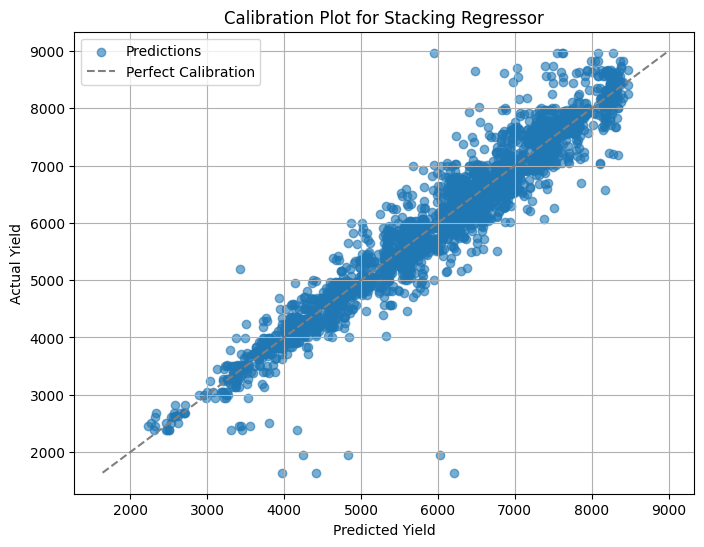

In [89]:
# Load data
X =train.drop(['yield', 'random_column'], axis=1)
y = train['yield']

# Define the Ridge regression pipeline
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1)),
    ('ridge', Ridge(alpha=0.40712299476079644, max_iter=1000, random_state=42))
])

# Define the random forest regressor
random_forest = RandomForestRegressor(
    n_estimators=448,
    max_depth=13,
    min_samples_split=15,
    min_samples_leaf=10,
    max_features=None,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Define the stacking regressor
stacking_reg = StackingRegressor(
    estimators=[
        ('linear', logistic_pipeline),
        ('random_forest', random_forest)
    ],
    final_estimator=Ridge(alpha=0.40712299476079644, random_state=42, max_iter=1000),
    cv=5
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the stacking model
stacking_reg.fit(X_train, y_train)

# Make predictions
y_pred = stacking_reg.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Plot calibration curve (for regression, use predicted vs actual scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, alpha=0.6, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='gray', label='Perfect Calibration')
plt.xlabel("Predicted Yield")
plt.ylabel("Actual Yield")
plt.title("Calibration Plot for Stacking Regressor")
plt.legend(loc='best')
plt.grid()
plt.show()


In [63]:
y_pred_test = stacking_reg.predict(test)

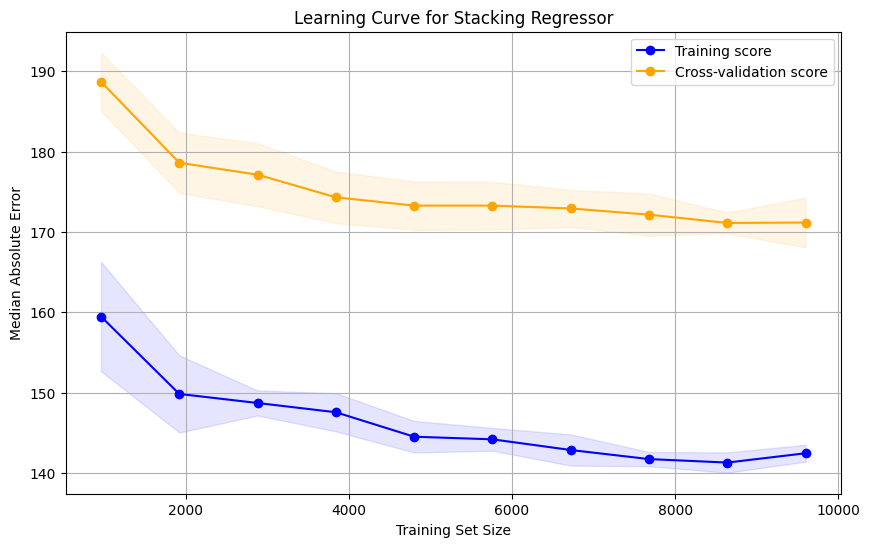

In [45]:
# Parameters for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    stacking_reg, X_train, y_train, cv=5, scoring="neg_median_absolute_error", train_sizes=train_sizes, n_jobs=-1
)

# Convert negative scores to positive median absolute error values
train_scores = -train_scores
test_scores = -test_scores

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-validation score")

# Fill in the standard deviation areas
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.1)

# Add labels and title
plt.xlabel("Training Set Size")
plt.ylabel("Median Absolute Error")
plt.title("Learning Curve for Stacking Regressor")
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot the learning curve
def plot_learning_curve(estimator, X, y, cv=5, scoring="neg_median_absolute_error", train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )

    # Calculate mean and standard deviation for train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

    plt.title('Learning Curve for Stacking Classifier')
    plt.xlabel('Training Size')
    plt.ylabel(scoring)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot learning curve for the stacking classifier with Isotonic calibration
plot_learning_curve(stacking_reg, X_train, y_train, cv=5, scoring="neg_median_absolute_error")

## Feature engeneering

In [84]:
# Copy the original dataset for feature engineering
df = train.copy()

test_copy = test.copy()

# 1. Interaction Features between Temperature and Pollinators
pollinator_cols = ['honeybee', 'bumbles', 'andrena', 'osmia']
temp_cols = ['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 
             'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange']

# Create interaction features between each pollinator type and temperature metrics
for pollinator in pollinator_cols:
    for temp in temp_cols:
        df[f'{pollinator}_{temp}_interaction'] = df[pollinator] * df[temp]
        test_copy[f'{pollinator}_{temp}_interaction'] = test_copy[pollinator] * test_copy[temp]

# 2. Temperature Range Features
df['UpperTRange_diff'] = df['MaxOfUpperTRange'] - df['MinOfUpperTRange']
df['LowerTRange_diff'] = df['MaxOfLowerTRange'] - df['MinOfLowerTRange']

test_copy['UpperTRange_diff'] = test_copy['MaxOfUpperTRange'] - test_copy['MinOfUpperTRange']
test_copy['LowerTRange_diff'] = test_copy['MaxOfLowerTRange'] - test_copy['MinOfLowerTRange']

# 3. Average Pollinator Count
df['average_pollinators'] = df[pollinator_cols].mean(axis=1)
df['total_pollinators'] = df[pollinator_cols].sum(axis=1)

test_copy['average_pollinators'] = test_copy[pollinator_cols].mean(axis=1)
test_copy['total_pollinators'] = test_copy[pollinator_cols].sum(axis=1)

# 4. Rain Intensity
df['rain_intensity'] = df['RainingDays'] / (df['AverageRainingDays'] + 1e-5)  # Adding small value to avoid division by zero

test_copy['rain_intensity'] = test_copy['RainingDays'] / (test_copy['AverageRainingDays'] + 1e-5)  # Adding small value to avoid division by zero


# 5. Interaction between Fruit Features and Seeds
df['fruit_mass_seeds_interaction'] = df['fruitmass'] * df['seeds']
df['fruit_set_mass_interaction'] = df['fruitset'] * df['fruitmass']
df['fruit_set_seeds_interaction'] = df['fruitset'] * df['seeds']

test_copy['fruit_mass_seeds_interaction'] = test_copy['fruitmass'] * test_copy['seeds']
test_copy['fruit_set_mass_interaction'] = test_copy['fruitset'] * test_copy['fruitmass']
test_copy['fruit_set_seeds_interaction'] = test_copy['fruitset'] * test_copy['seeds']

# Drop any columns that are no longer needed, if applicable
df = df.drop(columns=['id', 'Row#'], errors='ignore')  # Drop unnecessary ID columns, if desired

test_copy = test_copy.drop(columns=['id', 'Row#'], errors='ignore')  # Drop unnecessary ID columns, if desired


# Display the first few rows of the new dataframe with engineered features
test_copy.head()


,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,...,osmia_MinOfLowerTRange_interaction,osmia_AverageOfLowerTRange_interaction,UpperTRange_diff,LowerTRange_diff,average_pollinators,total_pollinators,rain_intensity,fruit_mass_seeds_interaction,fruit_set_mass_interaction,fruit_set_seeds_interaction
0,12.5,0.25,0.38,0.38,0.75,69.7,42.1,58.2,50.2,24.3,...,18.225,30.900,27.6,25.9,0.4400,1.76,60.713202,13.602240,0.187588,15.282594
1,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,...,16.500,27.950,37.4,35.2,0.4400,1.76,9.999000,16.354932,0.237149,19.805528
2,25.0,0.50,0.25,0.63,0.75,77.4,46.8,64.7,55.8,27.0,...,20.250,34.350,30.6,28.8,0.5325,2.13,60.713202,13.001766,0.169030,13.662480
3,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,68.2,33.0,...,24.750,41.925,37.4,35.2,0.5000,2.00,9.999000,16.561615,0.231898,18.514494
4,12.5,0.25,0.25,0.75,0.75,69.7,42.1,58.2,50.2,24.3,...,18.225,30.900,27.6,25.9,0.5000,2.00,9.999000,17.681713,0.252145,21.497046


### adding random column

In [54]:

# Add a new column with random integer values (e.g., between 1 and 100)
df['random_column'] = np.random.randint(1, 101, size=len(train))

# Save the modified dataset to a new CSV file (optional)
df.to_csv('train_with_random_column.csv', index=False)

# Show the first few rows of the modified dataset
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,...,osmia_MinOfLowerTRange_interaction,osmia_AverageOfLowerTRange_interaction,UpperTRange_diff,LowerTRange_diff,average_pollinators,total_pollinators,rain_intensity,fruit_mass_seeds_interaction,fruit_set_mass_interaction,fruit_set_seeds_interaction
0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,50.2,24.3,...,18.225,30.900,27.6,25.9,0.3750,1.50,61.536095,14.431757,0.202612,16.270550
1,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,...,0.000,0.000,34.0,32.0,0.0000,0.00,62.822863,9.829734,0.118585,9.279986
2,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,...,18.900,32.004,34.0,32.0,0.5325,2.13,60.713202,14.559679,0.195665,16.311270
3,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,...,18.225,30.900,27.6,25.9,0.4700,1.88,61.536884,15.017763,0.213954,17.587082
4,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,...,20.250,34.350,30.6,28.8,0.4700,1.88,61.536884,17.184015,0.241399,19.261872


In [85]:
y_pred_test = stacking_reg.predict(test_copy[['fruitset', 'fruit_set_seeds_interaction', 'seeds', 'fruit_mass_seeds_interaction', 'fruit_set_mass_interaction', 'fruitmass', 'UpperTRange_diff', 'MaxOfUpperTRange']])

## Feature importance

In [83]:
# Load the data
data = pd.read_csv('train_with_random_column.csv')

# Define target and features
y = data['yield']  # Assuming 'yield' is the target variable
X = data.drop(columns=['yield'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model for feature importance
forest_model = RandomForestRegressor(
    n_estimators=448,
    max_depth=13,
    min_samples_split=15,
    min_samples_leaf=10,
    max_features=None,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
forest_model.fit(X_train, y_train)
feature_importance = forest_model.feature_importances_

# Linear Regression for coefficients
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_coefs = linear_reg.coef_

# Permutation Importance
perm_importance = permutation_importance(forest_model, X_test, y_test, random_state=42, n_repeats=10, scoring='neg_mean_absolute_error')
perm_importance_values = perm_importance.importances_mean

# SHAP values
explainer = shap.Explainer(forest_model, X_train)  # Use Explainer for compatibility
shap_values = explainer(X_test)
shap_importance = np.abs(shap_values.values).mean(axis=0)  # Mean absolute SHAP values

# Adjusted Rand Score
# Here, we simulate clusters (e.g., 2 clusters based on y) to calculate the adjusted rand score
rand_score = adjusted_rand_score(np.where(y_test > y_test.median(), 1, 0),
                                 np.where(forest_model.predict(X_test) > y_test.median(), 1, 0))

# Create the result table
results = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest_FeatureImportance': feature_importance,
    'LinearReg_Coefficients': linear_coefs,
    'Permutation_Importance': perm_importance_values,
    'SHAP_Importance': shap_importance
})

# Append the Adjusted Rand Score as a summary row
#summary_row = pd.DataFrame({'Feature': ['Adjusted Rand Score'],
#                            'RandomForest_FeatureImportance': [rand_score],
#                            'LinearReg_Coefficients': [rand_score],
#                            'Permutation_Importance': [rand_score],
#                            'SHAP_Importance': [rand_score]})
#results = pd.concat([results, summary_row], ignore_index=True)

# Display results
# Sort by multiple columns in order of importance
results = results.sort_values(by=['RandomForest_FeatureImportance', 'Permutation_Importance','SHAP_Importance'], ascending=[False, False, False]).reset_index(drop=True)

results


100%|===================| 2989/3000 [02:35<00:00]        

,Feature,RandomForest_FeatureImportance,LinearReg_Coefficients,Permutation_Importance,SHAP_Importance
0,fruitset,0.862735,2.836612e+04,1072.272263,1021.305337
1,fruit_set_seeds_interaction,0.099516,-2.121878e+02,127.306685,152.098877
2,seeds,0.014661,-1.142065e+02,31.710332,48.590237
3,fruit_mass_seeds_interaction,0.004925,6.971992e+02,14.299948,41.627643
4,fruit_set_mass_interaction,0.003503,-1.866826e+04,1.558482,13.370313
5,fruitmass,0.002873,-1.747256e+04,3.998314,15.471017
6,random_column,0.002251,4.003224e-02,-0.065077,4.360426
7,MaxOfUpperTRange,0.000728,-8.621472e+13,0.206618,12.167164
8,UpperTRange_diff,0.000707,7.839961e+13,0.266524,11.430651
9,average_pollinators,0.000500,-3.437465e+11,-0.000417,1.388239


In [ ]:
X = train['fruitset', 'fruit_set_seeds_interaction', 'seeds', 'fruit_mass_seeds_interaction', 'fruit_set_mass_interaction', 'fruitmass', 'AverageRainingDays', 'RainingDays', 'rain_intensity', 'average_pollinators', 'clonesize', 'bumbles_MinOfUpperTRange_interaction', 'honeybee_MinOfLowerTRange_interaction', 'AverageOfUpperTRange', 'honeybee_MaxOfUpperTRange_interaction', 'bumbles']

In [73]:
results = results.sort_values(by=['Permutation_Importance','SHAP_Importance'], ascending=[False, False]).reset_index(drop=True)

results

,Feature,RandomForest_FeatureImportance,LinearReg_Coefficients,Permutation_Importance,SHAP_Importance
0,fruitset,0.823501,2.836612e+04,1207.108972,1167.162243
1,fruit_set_seeds_interaction,0.102651,-2.121878e+02,128.862442,126.823437
2,seeds,0.017096,-1.142065e+02,64.553029,73.476525
3,fruit_mass_seeds_interaction,0.009338,6.971992e+02,34.179872,63.235727
4,fruit_set_mass_interaction,0.007817,-1.866826e+04,17.861399,26.191744
5,fruitmass,0.006249,-1.747256e+04,10.466208,23.118249
6,AverageRainingDays,0.001008,8.091579e+02,0.655775,5.212270
7,RainingDays,0.001040,-1.700252e+01,0.481212,4.734181
8,rain_intensity,0.001204,1.580827e+00,0.285770,3.457078
9,average_pollinators,0.001919,-3.437465e+11,0.101379,2.938009


In [75]:
results = results.sort_values(by=['SHAP_Importance'], ascending=[False]).reset_index(drop=True)

['fruitset', 'fruit_set_seeds_interaction', 'seeds', 'fruit_mass_seeds_interaction', 'fruit_set_mass_interaction', 'fruitmass', 'UpperTRange_diff', 'MaxOfUpperTRange']

results

,Feature,RandomForest_FeatureImportance,LinearReg_Coefficients,Permutation_Importance,SHAP_Importance
0,fruitset,0.823501,2.836612e+04,1207.108972,1167.162243
1,fruit_set_seeds_interaction,0.102651,-2.121878e+02,128.862442,126.823437
2,seeds,0.017096,-1.142065e+02,64.553029,73.476525
3,fruit_mass_seeds_interaction,0.009338,6.971992e+02,34.179872,63.235727
4,fruit_set_mass_interaction,0.007817,-1.866826e+04,17.861399,26.191744
5,fruitmass,0.006249,-1.747256e+04,10.466208,23.118249
6,UpperTRange_diff,0.000810,7.839961e+13,-0.023746,11.300531
7,MaxOfUpperTRange,0.000857,-8.621472e+13,-0.069304,9.941633
8,random_column,0.007159,4.003224e-02,-0.719332,7.959765
9,AverageOfLowerTRange,0.000491,-5.795489e+02,-0.297384,6.288576


In [76]:
results = results.sort_values(by=['LinearReg_Coefficients'], ascending=[False]).reset_index(drop=True)

results

,Feature,RandomForest_FeatureImportance,LinearReg_Coefficients,Permutation_Importance,SHAP_Importance
0,osmia_MinOfUpperTRange_interaction,0.000713,1.126976e+14,-0.284170,1.487645
1,andrena_MinOfUpperTRange_interaction,0.000648,1.023235e+14,-0.082340,1.353532
2,MaxOfLowerTRange,0.000401,8.632714e+13,-0.441149,4.249309
3,UpperTRange_diff,0.000810,7.839961e+13,-0.023746,11.300531
4,MinOfLowerTRange,0.000398,3.390274e+13,-0.331531,3.827643
5,bumbles_MaxOfLowerTRange_interaction,0.000425,2.412378e+13,-0.057504,1.602219
6,LowerTRange_diff,0.000341,1.977417e+13,-0.215478,2.399393
7,honeybee_MinOfLowerTRange_interaction,0.000413,1.221539e+13,0.006185,1.041730
8,osmia_MaxOfUpperTRange_interaction,0.000735,6.962922e+12,-0.322929,2.108711
9,honeybee_MinOfUpperTRange_interaction,0.000439,5.786274e+12,-0.084611,1.127830


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import adjusted_rand_score
from sklearn.inspection import permutation_importance
import shap

# Load the data
data = pd.read_csv('train_with_random_column.csv')

# Define target and features
y = data['yield']  # Assuming 'yield' is the target variable
X = data.drop(columns=['yield'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model for feature importance
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
feature_importance = forest_model.feature_importances_

# Linear Regression for coefficients
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_coefs = linear_reg.coef_

# Permutation Importance
perm_importance = permutation_importance(forest_model, X_test, y_test, random_state=42, n_repeats=10, scoring='neg_mean_absolute_error')
perm_importance_values = perm_importance.importances_mean

# SHAP values
explainer = shap.Explainer(forest_model, X_train)  # Use Explainer for compatibility
shap_values = explainer(X_test)
shap_importance = np.abs(shap_values.values).mean(axis=0)  # Mean absolute SHAP values

# Adjusted Rand Score
# Here, we simulate clusters (e.g., 2 clusters based on y) to calculate the adjusted rand score
rand_score = adjusted_rand_score(np.where(y_test > y_test.median(), 1, 0),
                                 np.where(forest_model.predict(X_test) > y_test.median(), 1, 0))

# Create the result table
results = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest_FeatureImportance': feature_importance,
    'LinearReg_Coefficients': linear_coefs,
    'Permutation_Importance': perm_importance_values,
    'SHAP_Importance': shap_importance
})

# Append the Adjusted Rand Score as a summary row
summary_row = pd.DataFrame({'Feature': ['Adjusted Rand Score'],
                            'RandomForest_FeatureImportance': [rand_score],
                            'LinearReg_Coefficients': [rand_score],
                            'Permutation_Importance': [rand_score],
                            'SHAP_Importance': [rand_score]})
results = pd.concat([results, summary_row], ignore_index=True)
# Display results
# Sort by multiple columns in order of importance
results = results.sort_values(by=['RandomForest_FeatureImportance', 'Permutation_Importance','SHAP_Importance'], ascending=[False, False, False]).reset_index(drop=True)

results


 99%|===================| 2981/3000 [02:02<00:00]        

,Feature,RandomForest_FeatureImportance,LinearReg_Coefficients,Permutation_Importance,SHAP_Importance
0,fruitset,0.823501,2.836612e+04,1207.108972,1167.162243
1,Adjusted Rand Score,0.764964,7.649636e-01,0.764964,0.764964
2,fruit_set_seeds_interaction,0.102651,-2.121878e+02,128.862442,126.823437
3,seeds,0.017096,-1.142065e+02,64.553029,73.476525
4,fruit_mass_seeds_interaction,0.009338,6.971992e+02,34.179872,63.235727
5,fruit_set_mass_interaction,0.007817,-1.866826e+04,17.861399,26.191744
6,random_column,0.007159,4.003224e-02,-0.719332,7.959765
7,fruitmass,0.006249,-1.747256e+04,10.466208,23.118249
8,average_pollinators,0.001919,-3.437465e+11,0.101379,2.938009
9,total_pollinators,0.001887,-1.598102e+12,-0.441575,2.879577


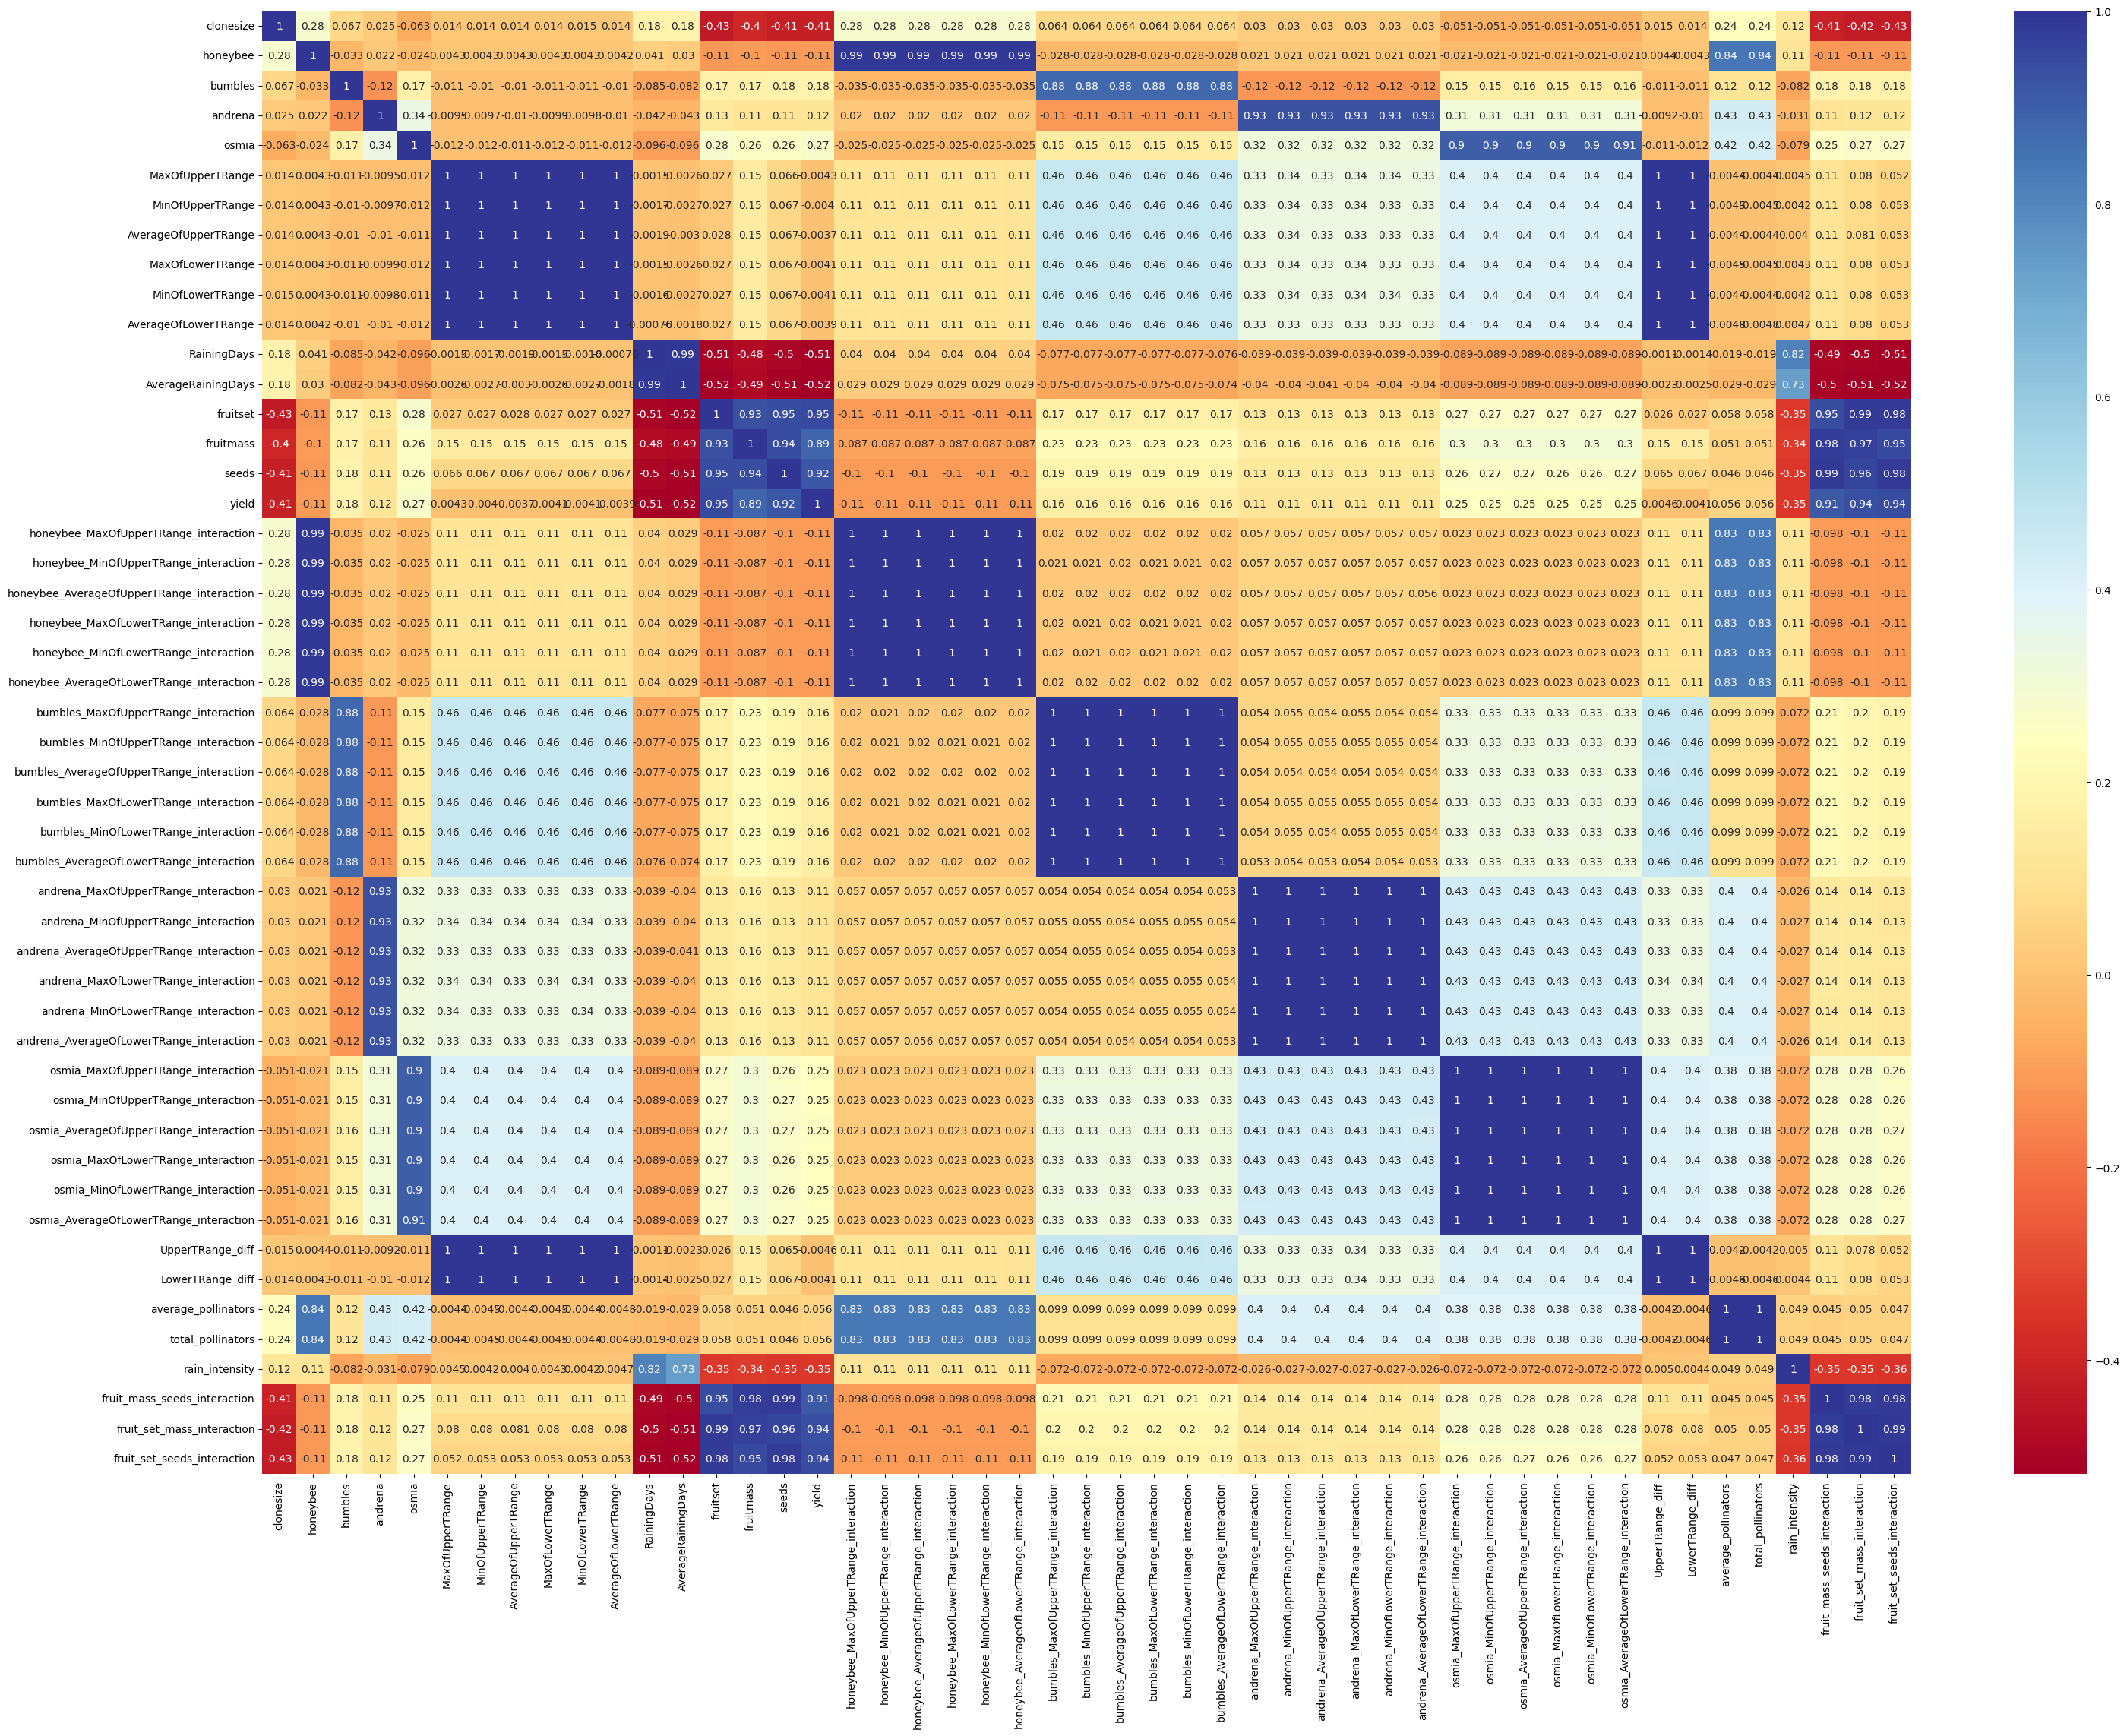

In [57]:
corr = df.corr()
plt.subplots(figsize=(35,25))
sns.heatmap(corr, annot=True, cmap='RdYlBu')
plt.show()

In [73]:
X = df.drop(['yield','clonesize'], axis=1)
y = df['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(max_depth=44, min_samples_split=20, min_samples_leaf=6, n_estimators=300, bootstrap=True, n_jobs=-1, random_state=42, max_features='sqrt')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

#y_pred_test = model.predict(test)

MAE_test = mean_absolute_error(y_test, y_pred)
MAE_train = mean_absolute_error(y_train, y_pred_train)
print(MAE_test, MAE_train)

247.34907205346795 196.42398316976693


## Optuna

In [43]:
# Separate features and target
X = train.drop(['yield'], axis=1)
y = train['yield']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters to search
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 2, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    # Create the model with suggested hyperparameters
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )

    # Evaluate using cross-validation
    mae = -cross_val_score(rf, X_train, y_train, cv=3, scoring="neg_mean_absolute_error", n_jobs=-1).mean()
    
    return mae

# Create and run an Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("Best Parameters:", study.best_params)
print("Best MAE:", study.best_value)

# Train the best model on the full training set
best_rf = RandomForestRegressor(**study.best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Evaluate on the test set
test_mae = mean_absolute_error(y_test, best_rf.predict(X_test))
print("Test MAE:", test_mae)


[I 2024-11-08 18:24:34,995] A new study created in memory with name: no-name-39458f37-3563-4a0a-81d1-3cd9696f5e9b
[I 2024-11-08 18:24:35,819] Trial 0 finished with value: 267.14707019886697 and parameters: {'n_estimators': 208, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 267.14707019886697.
[I 2024-11-08 18:24:38,014] Trial 1 finished with value: 261.45550135704093 and parameters: {'n_estimators': 408, 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 261.45550135704093.
[I 2024-11-08 18:24:39,146] Trial 2 finished with value: 260.8204662669414 and parameters: {'n_estimators': 272, 'max_depth': 18, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 2 with value: 260.8204662669414.
[I 2024-11-08 18:24:41,000] Trial 3 finished with value: 260.4211160275943 

Best Parameters: {'n_estimators': 448, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': True}
Best MAE: 248.0532215219148
Test MAE: 244.3798681933774


### Optuna for ridge

In [49]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Objective function for Optuna
def objective(trial):
    # Suggest a value for alpha
    alpha = trial.suggest_loguniform('alpha', 1e-4, 100)
    
    # Create Ridge model with the suggested alpha value
    ridge = Ridge(alpha=alpha, max_iter=1000, random_state=42)
    
    # Create a pipeline with scaling, polynomial features, and the Ridge model
    ridge_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=1)),  # Adjust degree if needed
        ('ridge', ridge)
    ])
    
    # Use cross-validation to evaluate the model performance
    # Here, we're using negative MAE for consistency with Optuna's maximization objective
    neg_mae = cross_val_score(ridge_pipeline, X_train, y_train, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1).mean()
    
    # Return the positive MAE as Optuna aims to minimize the objective function
    return -neg_mae

# Create and run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)  # You can adjust the number of trials

# Display best results
print("Best alpha:", study.best_params['alpha'])
print("Best MAE:", study.best_value)

# Train the final model using the best parameters
best_alpha = study.best_params['alpha']
final_ridge = Ridge(alpha=best_alpha, max_iter=1000, random_state=42)
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1)),
    ('ridge', final_ridge)
])
ridge_pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred = ridge_pipeline.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("Test MAE with optimized Ridge:", test_mae)


[I 2024-11-08 19:39:07,968] A new study created in memory with name: no-name-a2b0dd9b-c982-44be-afea-c44a92fd98d9
/var/folders/66/x0152m9s4fxg2fz8tfrrqlc80000gp/T/ipykernel_98785/1528154430.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 100)
[I 2024-11-08 19:39:10,829] Trial 0 finished with value: 275.3753165109624 and parameters: {'alpha': 0.24390136435662196}. Best is trial 0 with value: 275.3753165109624.
[I 2024-11-08 19:39:11,442] Trial 1 finished with value: 275.44742415652325 and parameters: {'alpha': 27.551392422487602}. Best is trial 0 with value: 275.3753165109624.
[I 2024-11-08 19:39:11,586] Trial 2 finished with value: 279.6717689792621 and parameters: {'alpha': 0.0004653082404614141}. Best is trial 0 with value: 275.3753165109624.
[I 2024-11-08 19:39:11,720] Tri

Best alpha: 0.40712299476079644
Best MAE: 275.3605144092433
Test MAE with optimized Ridge: 275.3847816839567


## Submission

In [86]:
subm = pd.read_csv("sample_submission.csv")
subm['yield'] = y_pred_test
subm.to_csv("my_submission_1.csv", index=False)